In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X=np.array([[-0.5,-0.5],[0.5,-0.5],[-0.5,0.5],[0.5,0.5]])
y=np.array([-0.5,0.5,0.5,-0.5])

In [3]:
X

array([[-0.5, -0.5],
       [ 0.5, -0.5],
       [-0.5,  0.5],
       [ 0.5,  0.5]])

In [4]:
y

array([-0.5,  0.5,  0.5, -0.5])

In [5]:
X[0]

array([-0.5, -0.5])

In [139]:
class network():
    def __init__(self,neutrons):
        self.num=neutrons
        self.W1=np.random.rand(2,neutrons)*0.1
        
        self.bias1=np.empty([neutrons])
        self.bias1.fill(0.1)
        self.W2=np.random.rand(neutrons,1)*0.1

        self.bias2=np.array([0.1]) 
        print("a network class is defined")
        print(self.W1)
        print("W2",self.W2)
        self.history=[]
        self.v_w1=0
        self.v_b1=0
        self.v_w2=0
        self.v_b2=0
    def fit(self,X,y,iteration,learnrate=0.1,Monmentum=False):
        for i in range(iteration):
            a=[0,1,2,3]
            np.random.shuffle(a)
            for j in a:
                #forward
                h1_=np.dot(X[j],self.W1)+self.bias1
                h1=np.tanh(h1_)
                out_=np.dot(h1,self.W2)+self.bias2
                out=np.tanh(out_)
                
                #error
                delt_error=(out-y[j])
                
                msn=delt_error*delt_error
                if i%100==0:
                    print(i,msn)
                self.history.append(msn)
                #backward
                delt_b2=delt_error*(1-out*out)
                delt_w2=delt_b2*h1
                
                
                #hidenlayer
                #print("delt_error: ", delt_error)
                #print("first :",delt_error*(1-out*out)*self.W2)
                #print("second",(1-h1*h1))
                
                delt_b1=(delt_error*(1-out*out)*self.W2).T*(1-h1*h1)
                #print("delta_b (should be 6*1 ) ",delt_b1)
                delt_w1=delt_b1.T*X[j]
                #print("should not same:", delt_w1)
                
                
                # updata weight
                #print("delta_w1 should be 6*2 ",delt_w1)
                if Monmentum==False:
                    beta=0
                else:
                    beta=0.9
                    
                self.W1=self.W1-beta*self.v_w1-(1-beta)*learnrate*delt_w1.T
                self.bias1=self.bias1-beta*self.v_b1-(1-beta)*learnrate*delt_b1
                #print("self.w2 \n",self.W2)
                #print("delt_w2 \n",delt_w2)
                self.W2=self.W2-beta*self.v_w2-(1-beta)*learnrate*delt_w2.reshape((self.num,1))
                #print("w2",self.W2)
                self.bias2=self.bias2-beta*self.v_b2-(1-beta)*learnrate*delt_b2 
                
                self.v_w1 = delt_w1.T
                self.v_b1=delt_b1
                self.v_w2= delt_w2.reshape((self.num,1))
                self.v_b2=delt_b2 
                    
                
    def predict(X,y):
        pass
    

In [140]:
def run_model(neu_n=2,inter=200,learnrate=0.1,Mon=False):
    test=network(neu_n)
    print(X)
    test.fit(X,y,inter,learnrate,Mon)
    history=[]
    for i in test.history[1:]:
        #print(i.shape)
        history.append(i[0,0])
    plt.plot(history)
    plt.show()  

a network class is defined
[[ 0.06240669  0.01489776  0.06673612  0.02253145  0.04798046  0.05468968
   0.0480556   0.05761161  0.00118977  0.02469227]
 [ 0.03189531  0.02169651  0.0887077   0.05318538  0.09448505  0.08052216
   0.08277053  0.06504188  0.09141903  0.06283213]]
W2 [[ 0.03973371]
 [ 0.07981291]
 [ 0.00670191]
 [ 0.03883193]
 [ 0.01774977]
 [ 0.02969668]
 [ 0.09610623]
 [ 0.09934098]
 [ 0.01067833]
 [ 0.07947913]]
[[ 0.5  0.5]
 [ 0.5 -0.5]
 [-0.5 -0.5]
 [-0.5  0.5]]
0 [ 0.12707396]
0 [[ 0.11489195]]
0 [[ 0.52678603]]
0 [[ 0.4431937]]
100 [[  4.66766167e-08]]
100 [[  8.34144727e-08]]
100 [[  3.08782803e-07]]
100 [[  4.21300216e-07]]
200 [[  1.62363359e-07]]
200 [[  1.46296044e-07]]
200 [[  2.06683440e-07]]
200 [[  2.07116082e-07]]
300 [[  1.69968061e-07]]
300 [[  1.81735154e-07]]
300 [[  1.69802133e-07]]
300 [[  2.04742814e-07]]
400 [[  1.33719606e-07]]
400 [[  2.01013139e-07]]
400 [[  1.80034086e-07]]
400 [[  2.07430568e-07]]
500 [[  1.69204541e-07]]
500 [[  1.63447292e-0

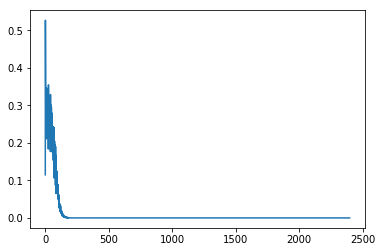

In [142]:
run_model(neu_n=10,inter=600,learnrate=0.1,Mon=False)

a network class is defined
[[ 0.09563213  0.01967008]
 [ 0.05608012  0.00993943]]
W2 [[ 0.08573252]
 [ 0.06733894]]
[[ 0.5  0.5]
 [ 0.5 -0.5]
 [-0.5 -0.5]
 [-0.5  0.5]]
0 [ 0.15415276]
0 [[ 0.38029633]]
0 [[ 0.00349058]]
0 [[ 0.16929287]]
100 [[  3.90137108e-06]]
100 [[  5.79185850e-06]]
100 [[  1.17328210e-06]]
100 [[  1.01513654e-05]]
200 [[  1.23693312e-07]]
200 [[  5.62037514e-07]]
200 [[  4.88005090e-06]]
200 [[  1.99832791e-07]]
300 [[  9.38050086e-07]]
300 [[  3.20439590e-06]]
300 [[  5.65561059e-07]]
300 [[  2.39452188e-06]]
400 [[  6.11877584e-07]]
400 [[  3.13640029e-08]]
400 [[  2.02208211e-06]]
400 [[  2.59659864e-06]]
500 [[  3.08089740e-07]]
500 [[  6.20572029e-07]]
500 [[  4.04267743e-08]]
500 [[  2.23876893e-06]]


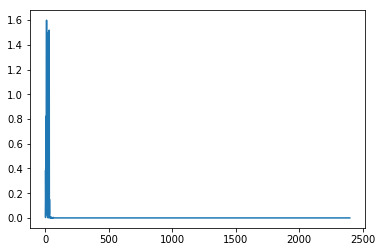

In [143]:
run_model(neu_n=2,inter=600,learnrate=0.1,Mon=True)

a network class is defined
[[ 0.01857686  0.08814352  0.07899981  0.01316028]
 [ 0.03199687  0.01946972  0.02066898  0.07311369]]
W2 [[ 0.06519676]
 [ 0.0295846 ]
 [ 0.00921534]
 [ 0.03441091]]
[[ 0.5  0.5]
 [ 0.5 -0.5]
 [-0.5 -0.5]
 [-0.5  0.5]]
0 [ 0.14967742]
0 [[ 0.42575314]]
0 [[ 0.17452989]]
0 [[ 0.40227932]]
100 [[  5.62801281e-08]]
100 [[  1.41905782e-07]]
100 [[  6.18356365e-07]]
100 [[  5.89038071e-09]]
200 [[  9.52141302e-08]]
200 [[  1.10205568e-07]]
200 [[  1.02845792e-07]]
200 [[  1.37929648e-07]]
300 [[  9.64554161e-08]]
300 [[  1.13900441e-07]]
300 [[  1.12150331e-07]]
300 [[  1.19766022e-07]]
400 [[  9.72470197e-08]]
400 [[  7.82613364e-08]]
400 [[  1.32858337e-07]]
400 [[  1.25298461e-07]]
500 [[  9.55222408e-08]]
500 [[  1.10350132e-07]]
500 [[  9.88902984e-08]]
500 [[  1.29619301e-07]]


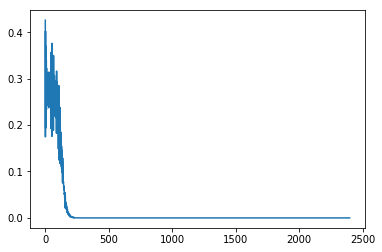

In [144]:
run_model(neu_n=4,inter=600,learnrate=0.1,Mon=False)

a network class is defined
[[ 0.07777642  0.04509358  0.0272977   0.08333342]
 [ 0.00099994  0.04416484  0.08611182  0.08423728]]
W2 [[ 0.05637969]
 [ 0.06186397]
 [ 0.00139411]
 [ 0.0722126 ]]
[[ 0.5  0.5]
 [ 0.5 -0.5]
 [-0.5 -0.5]
 [-0.5  0.5]]
0 [ 0.143929]
0 [[ 0.38481023]]
0 [[ 0.91233009]]
0 [[ 0.38473155]]
100 [[  2.62706259e-07]]
100 [[  4.18805585e-06]]
100 [[  1.66391104e-06]]
100 [[  6.59997673e-08]]
200 [[  8.41900549e-07]]
200 [[  1.72540042e-07]]
200 [[  6.27899397e-07]]
200 [[  3.52726032e-07]]
300 [[  2.64911395e-07]]
300 [[  7.01538523e-08]]
300 [[  6.93878704e-07]]
300 [[  1.60654763e-08]]
400 [[  6.94210672e-07]]
400 [[  1.60274792e-07]]
400 [[  5.73163201e-07]]
400 [[  3.62457951e-07]]
500 [[  4.55250590e-13]]
500 [[  1.70011274e-07]]
500 [[  6.35085063e-11]]
500 [[  4.91737496e-07]]


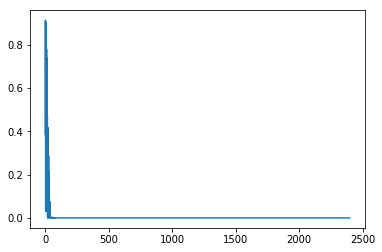

In [145]:
run_model(neu_n=4,inter=600,learnrate=0.1,Mon=True)

a network class is defined
[[ 0.03207218  0.06790227  0.08681702  0.07709034  0.09179073  0.05593511]
 [ 0.03605807  0.0111371   0.08591742  0.08022121  0.09139732  0.09551633]]
W2 [[ 0.02632558]
 [ 0.06630049]
 [ 0.09904528]
 [ 0.02946413]
 [ 0.06313628]
 [ 0.02600263]]
[[ 0.5  0.5]
 [ 0.5 -0.5]
 [-0.5 -0.5]
 [-0.5  0.5]]
0 [ 0.15331078]
0 [[ 0.10836219]]
0 [[ 0.49177231]]
0 [[ 0.42501949]]
100 [[  1.39860691e-06]]
100 [[  2.64502593e-07]]
100 [[  7.32114939e-07]]
100 [[  1.52283583e-06]]
200 [[  6.86343326e-07]]
200 [[  1.04466886e-06]]
200 [[  8.74498969e-07]]
200 [[  1.00345385e-06]]
300 [[  8.33006375e-07]]
300 [[  9.70378608e-07]]
300 [[  8.09881959e-07]]
300 [[  9.49197852e-07]]
400 [[  6.39496433e-07]]
400 [[  9.96474527e-07]]
400 [[  8.33627621e-07]]
400 [[  1.05906897e-06]]
500 [[  7.33548037e-07]]
500 [[  9.23548891e-07]]
500 [[  8.21601239e-07]]
500 [[  1.00214322e-06]]


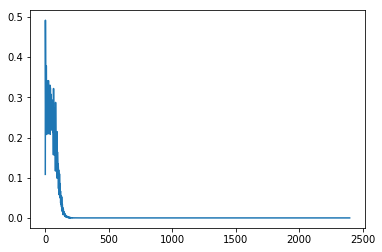

In [146]:
run_model(neu_n=6,inter=600,learnrate=0.1,Mon=False)

a network class is defined
[[ 0.04987672  0.09268313  0.02352142  0.01749151  0.00235034  0.03459431]
 [ 0.00379594  0.0703436   0.01189004  0.0925158   0.04525077  0.05754089]]
W2 [[ 0.01232492]
 [ 0.01651054]
 [ 0.04425489]
 [ 0.06642892]
 [ 0.06912497]
 [ 0.09261534]]
[[ 0.5  0.5]
 [ 0.5 -0.5]
 [-0.5 -0.5]
 [-0.5  0.5]]
0 [ 0.40129366]
0 [[ 0.14550622]]
0 [[ 0.87300158]]
0 [[ 0.16078563]]
100 [[  7.32797236e-11]]
100 [[  4.94507601e-11]]
100 [[  3.12599006e-11]]
100 [[  7.87999592e-11]]
200 [[  4.81870488e-11]]
200 [[  5.79630225e-13]]
200 [[  1.83032305e-10]]
200 [[  1.35821786e-10]]
300 [[  2.21210458e-12]]
300 [[  1.54785449e-14]]
300 [[  6.71080961e-13]]
300 [[  9.01107409e-11]]
400 [[  4.79561137e-13]]
400 [[  7.91365084e-11]]
400 [[  5.62402327e-14]]
400 [[  1.00196888e-11]]
500 [[  9.92508485e-11]]
500 [[  7.94693099e-11]]
500 [[  4.56858591e-11]]
500 [[  1.54977788e-10]]


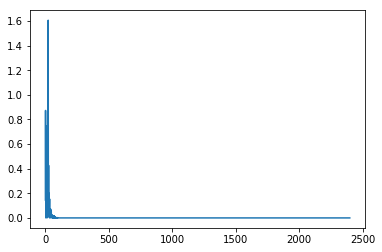

In [147]:
run_model(neu_n=6,inter=600,learnrate=0.1,Mon=True)

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Generate dummy data
import numpy as np

model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(6, activation='tanh', input_dim=2))
model.add(Dense(1, activation='tanh'))

sgd = SGD(lr=0.1, decay=0, momentum=0.9, nesterov=True)
model.compile(loss='MSE',
              optimizer=sgd,
              metrics=['accuracy'])

history=model.fit(X,y,
          epochs=200,
          batch_size=1)
score = model.evaluate(X, y, batch_size=1)

Epoch 1/200
4/4 [==============================] - 0s 13ms/step - loss: 0.7396 - acc: 0.0000e+00
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5541 - acc: 0.0000e+00
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 0.5416 - acc: 0.0000e+00
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5602 - acc: 0.0000e+00
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5841 - acc: 0.0000e+00
Epoch 6/200
4/4 [==============================] - 0s 1ms/step - loss: 0.5460 - acc: 0.0000e+00
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5624 - acc: 0.0000e+00
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4055 - acc: 0.0000e+00
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3940 - acc: 0.0000e+00
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 0.8818 - acc: 0.0000e+00
Epoch 11/200
4/4 [====================

4/4 [==============================] - 0s 1ms/step - loss: 1.2350e-12 - acc: 0.0000e+00
Epoch 84/200
4/4 [==============================] - 0s 2ms/step - loss: 2.7556e-13 - acc: 0.0000e+00
Epoch 85/200
4/4 [==============================] - 0s 3ms/step - loss: 7.6161e-14 - acc: 0.0000e+00
Epoch 86/200
4/4 [==============================] - 0s 2ms/step - loss: 2.7756e-14 - acc: 0.0000e+00
Epoch 87/200
4/4 [==============================] - 0s 1ms/step - loss: 7.7272e-14 - acc: 0.0000e+00
Epoch 88/200
4/4 [==============================] - 0s 2ms/step - loss: 2.6645e-14 - acc: 0.0000e+00
Epoch 89/200
4/4 [==============================] - 0s 2ms/step - loss: 2.4203e-14 - acc: 0.0000e+00
Epoch 90/200
4/4 [==============================] - 0s 2ms/step - loss: 3.3751e-14 - acc: 0.0000e+00
Epoch 91/200
4/4 [==============================] - 0s 1ms/step - loss: 2.3981e-14 - acc: 0.0000e+00
Epoch 92/200
4/4 [==============================] - 0s 3ms/step - loss: 2.7756e-14 - acc: 0.0000e+00
Epo

4/4 [==============================] - 0s 3ms/step - loss: 2.8866e-15 - acc: 0.0000e+00
Epoch 163/200
4/4 [==============================] - 0s 1ms/step - loss: 2.8866e-15 - acc: 0.0000e+00
Epoch 164/200
4/4 [==============================] - 0s 3ms/step - loss: 8.8818e-16 - acc: 0.0000e+00
Epoch 165/200
4/4 [==============================] - 0s 2ms/step - loss: 8.8818e-16 - acc: 0.0000e+00
Epoch 166/200
4/4 [==============================] - 0s 4ms/step - loss: 2.8866e-15 - acc: 0.0000e+00
Epoch 167/200
4/4 [==============================] - 0s 2ms/step - loss: 2.8866e-15 - acc: 0.0000e+00
Epoch 168/200
4/4 [==============================] - 0s 2ms/step - loss: 2.8866e-15 - acc: 0.0000e+00
Epoch 169/200
4/4 [==============================] - 0s 2ms/step - loss: 2.8866e-15 - acc: 0.0000e+00
Epoch 170/200
4/4 [==============================] - 0s 2ms/step - loss: 8.8818e-16 - acc: 0.0000e+00
Epoch 171/200
4/4 [==============================] - 0s 3ms/step - loss: 2.8866e-15 - acc: 0.000

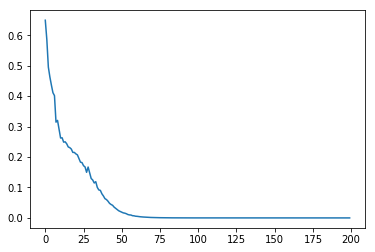

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.show()